In [1]:
# I load the needed libraries
library(dplyr)
library(scales)
library(GoFKernel)

library(mvtnorm)
library(gplots)

options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




# Preparation of the simulation

I load the functions from the class file:


In [2]:
source("class_MCMC.R")

I define then the function that I want to use as output of the MCMCs:

In [3]:
# Function to sampled from: n-dim gaussian with chosen sigmas and centers
# posterior_g_inhom = function (theta) {

#     sigmas = c(1:length(theta))
#     centers = c(seq(length(theta), 1))

#     product = 1
#     for (i in 1:length(theta)) {
#         product = product * exp(-(theta[i] - centers[i])**2/sigmas[i]**2)
#     }

#     return (product)

# }

cauchy1_gauss2 = function (theta) {

    sigmas = c(2.5, 4.3)
    centers = c(0.4, 9)

    product = 1
    for (i in 1:2) {
        product = product * exp(-(theta[i] - centers[i])**2/sigmas[i]**2)
    }

    product = product * (dcauchy(theta[3], -10, 2) + 4*dcauchy(theta[3], 10, 4))

    return (product)

} 

chosen_function = cauchy1_gauss2

Then I only have to determine the parameters for the initialization = the "hyperparameters" of the simulations

In [4]:
# The initial parameters are:
init = c(2, 4, 10)
std = diag(1, 3)

N = as.integer(1e5)
burn_in = as.integer(1e4)

print_step = as.integer(1e2)
# print_init = as.integer(1e3)

N_tot = N + burn_in

# For Haario:
epsilon = 0.001


# Simulations

Acceptance rate =  76.32364 %


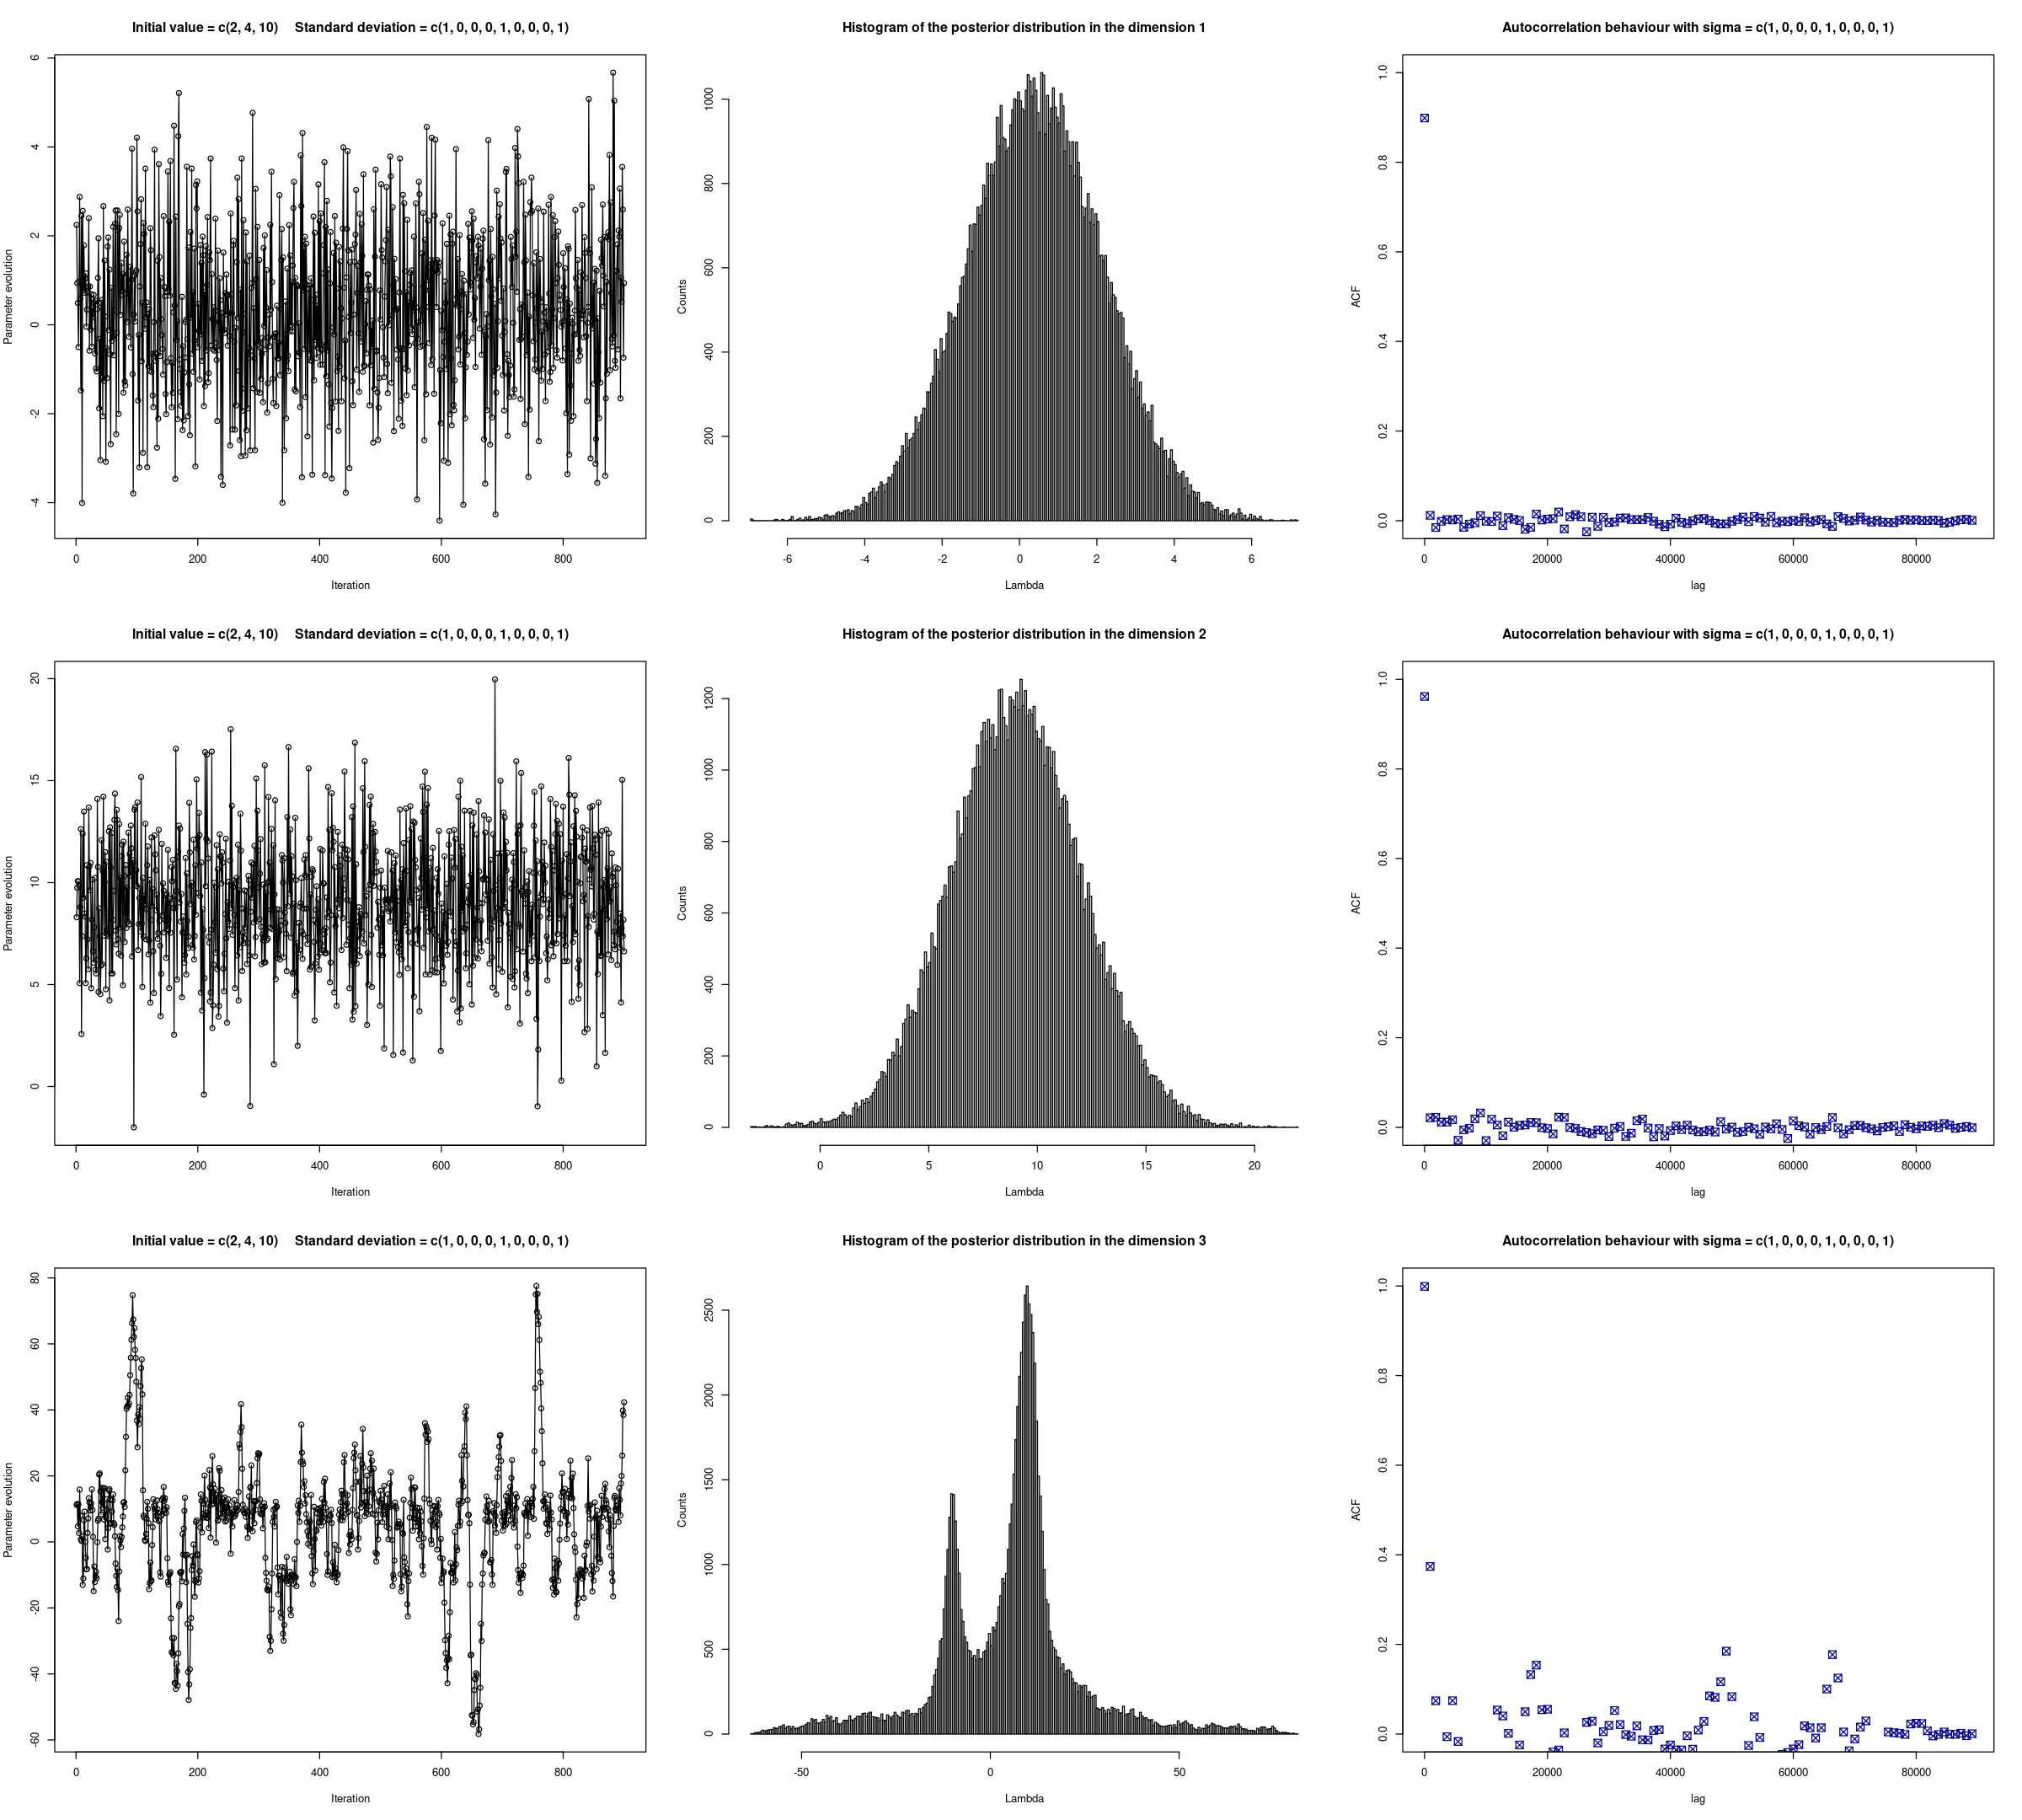

In [5]:
# MVTNORM 

# Evaluate then the MCMC
mcmc_g = random_steps_mvtnorm (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

# Selecting the sequence after the burn-in
mcmc_g = mcmc_g[burn_in:N, ]

# Plotting the results
show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  83.77818 %


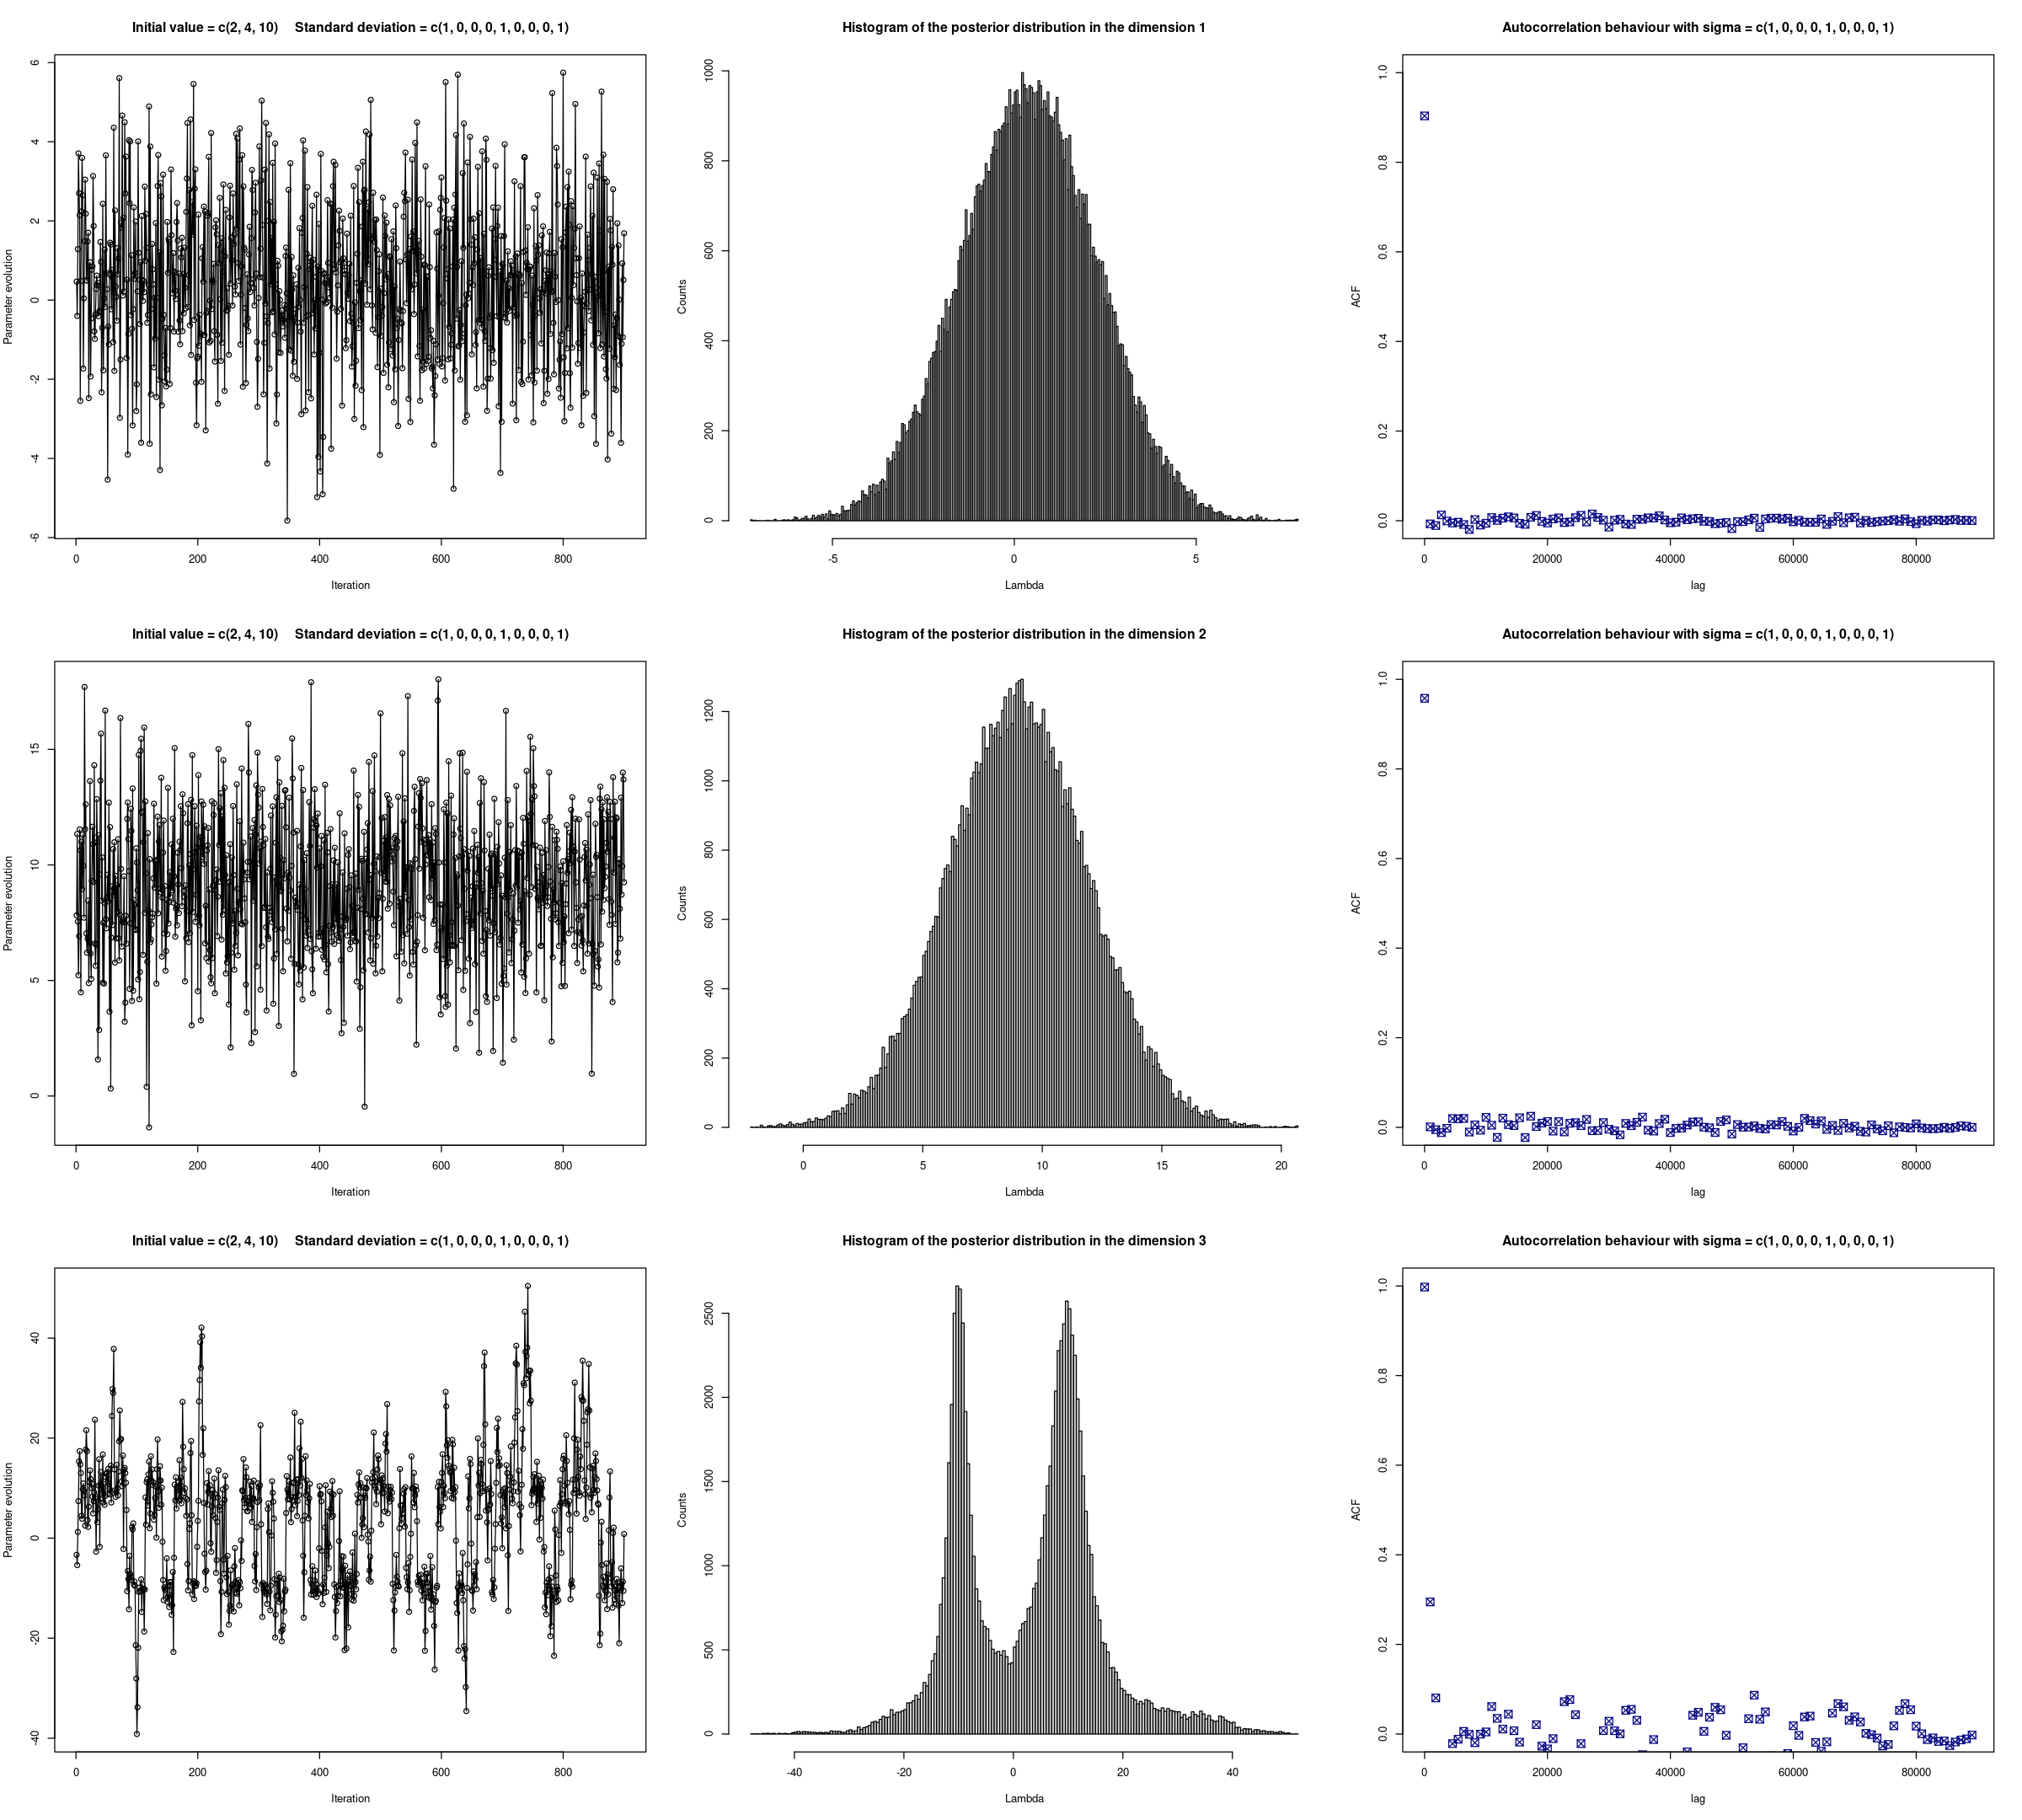

In [6]:
# MVTNORM GIBBS

mcmc_g = random_steps_mvtnorm_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [7]:
# # SIMPLE ADAPTIVE

# mcmc_g = random_steps_simple (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [8]:
# # SIMPLE ADAPTIVE GIBBS

# mcmc_g = random_steps_simple_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  16.23455 %
Final mean =  0.4348996 8.992801 4.273241 
Final covariance matrix = 
          [,1]      [,2]        [,3]
[1,]  6.336503  13.59193    8.015375
[2,] 13.591934 296.20826  158.235572
[3,]  8.015375 158.23557 1085.369957


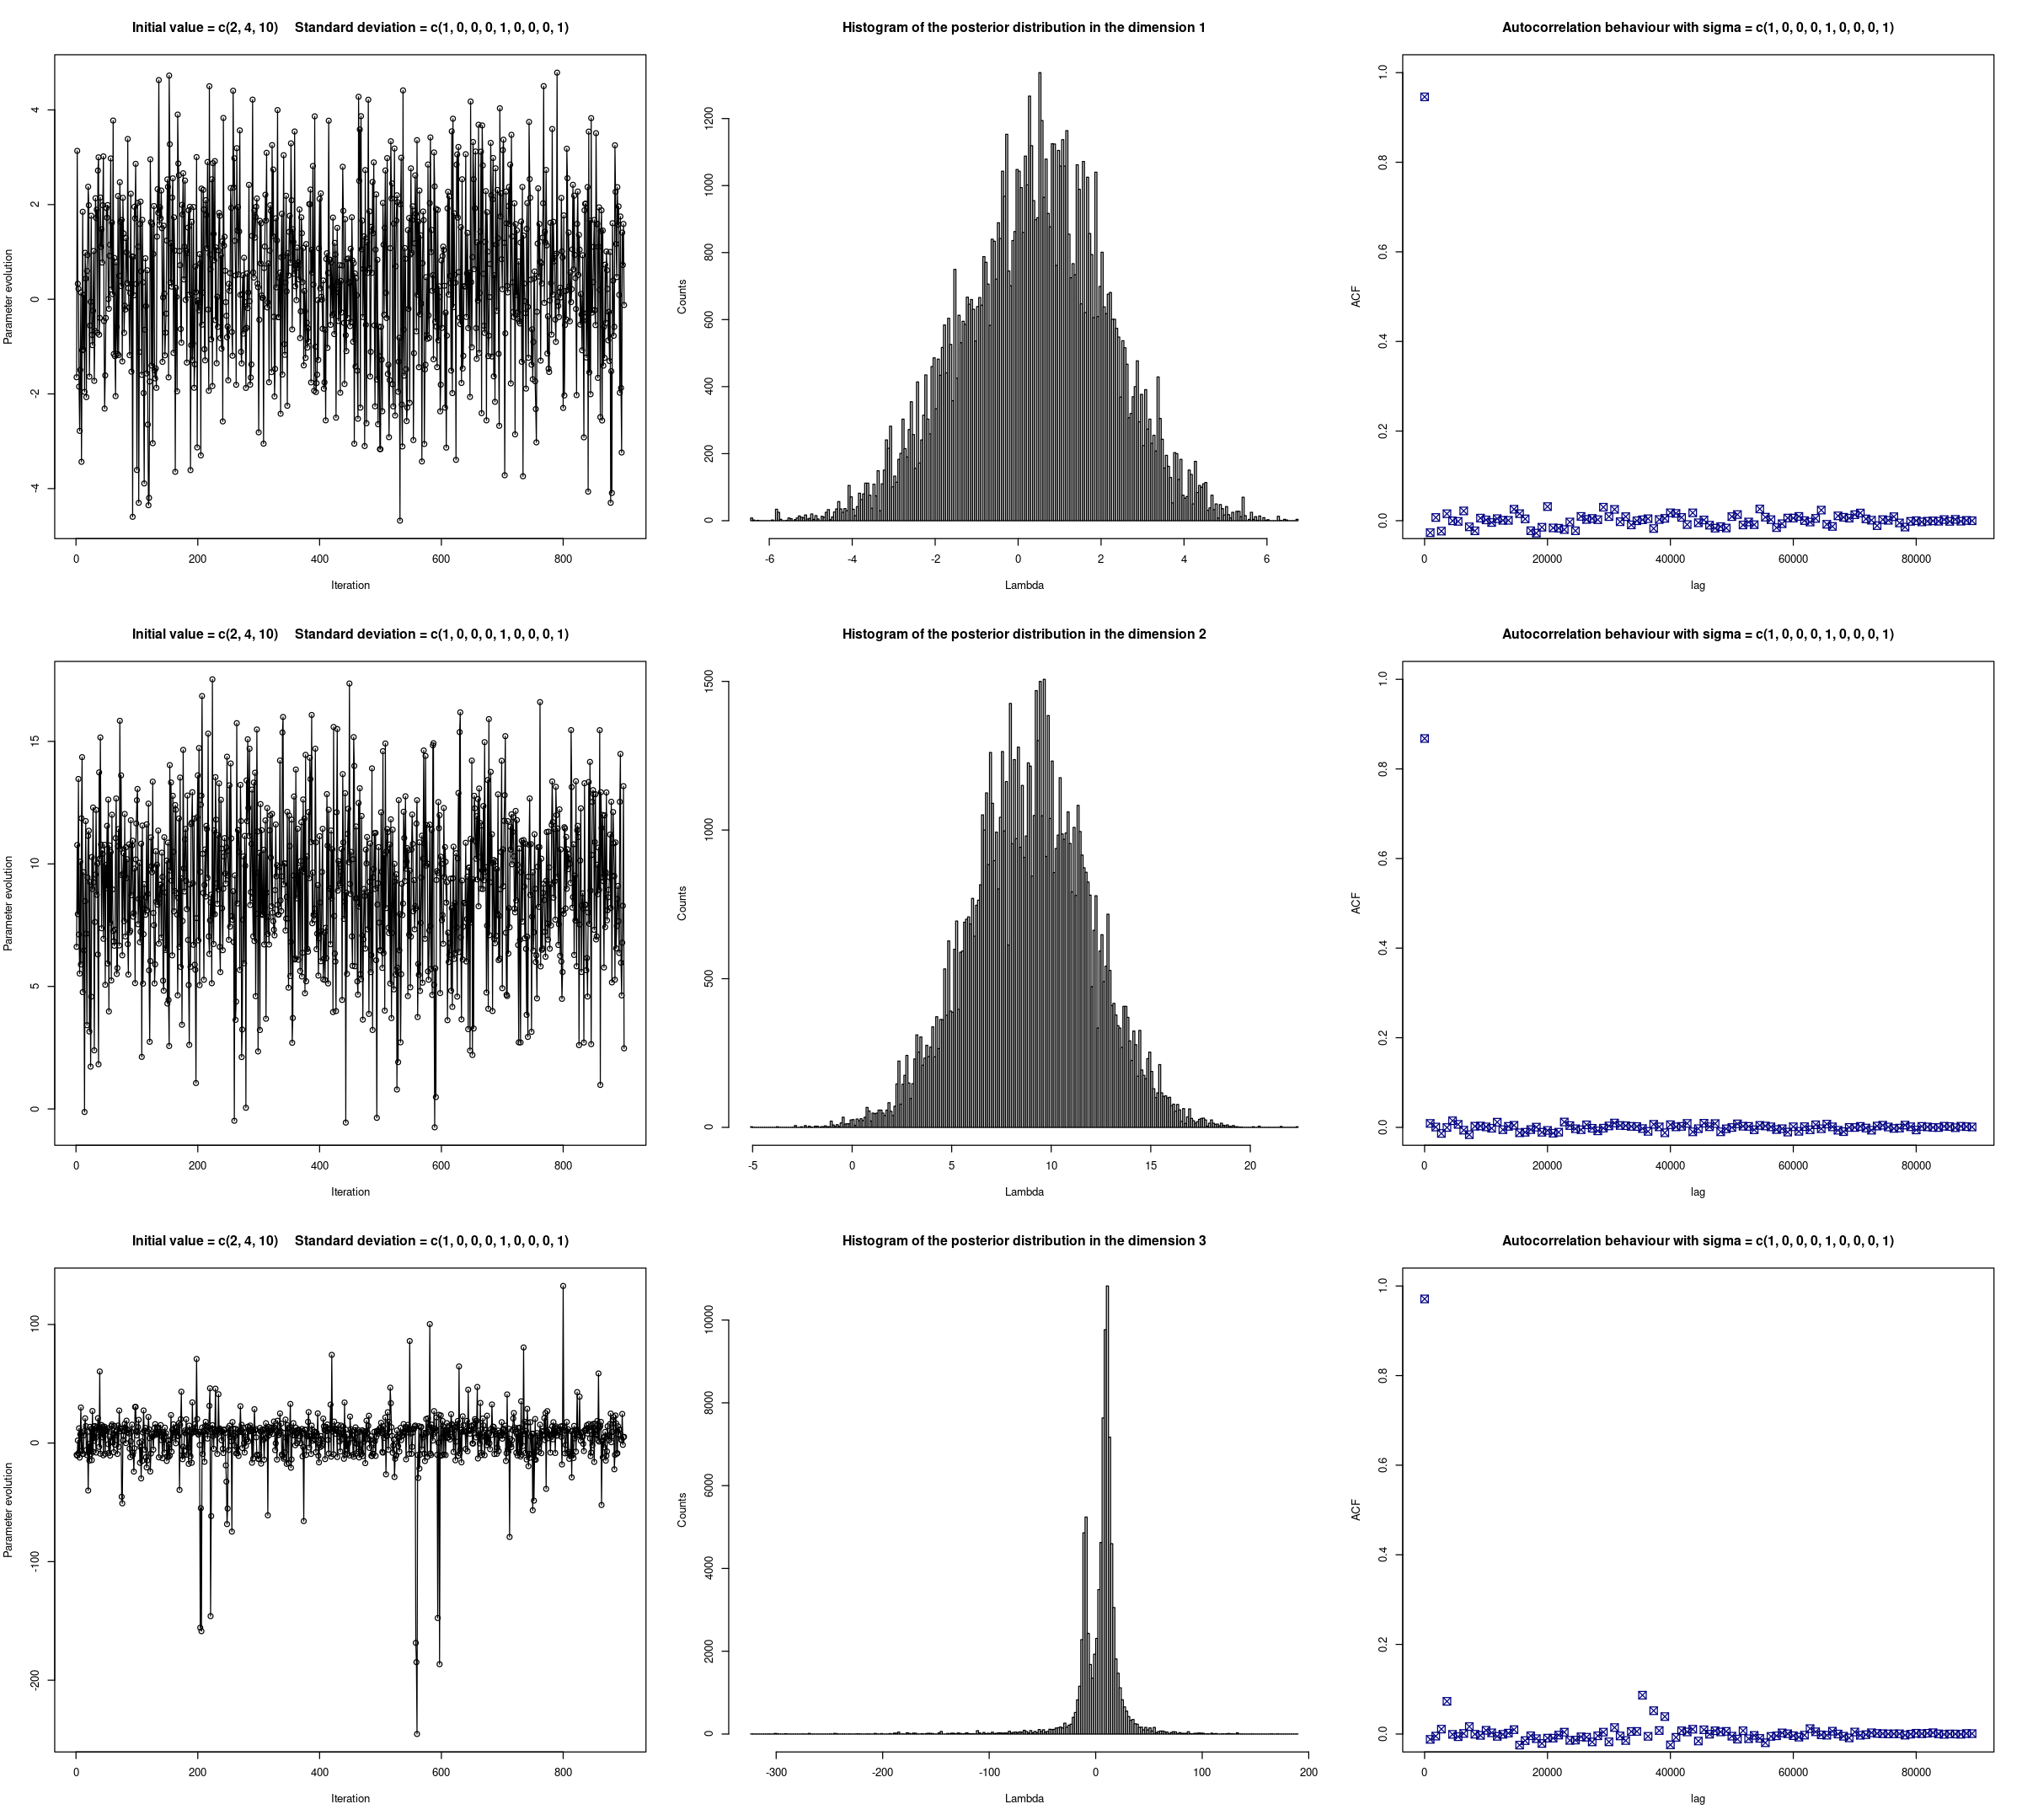

In [9]:
# HAARIO

mcmc_g = random_steps_haario (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  35.07273 %
Final mean =  0.4023233 8.964402 5.841595 
Final covariance matrix = 
          [,1]     [,2]       [,3]
[1,]  6.662839  12.0878   7.966028
[2,] 12.087800 289.2591 180.328339
[3,]  7.966028 180.3283 424.962495


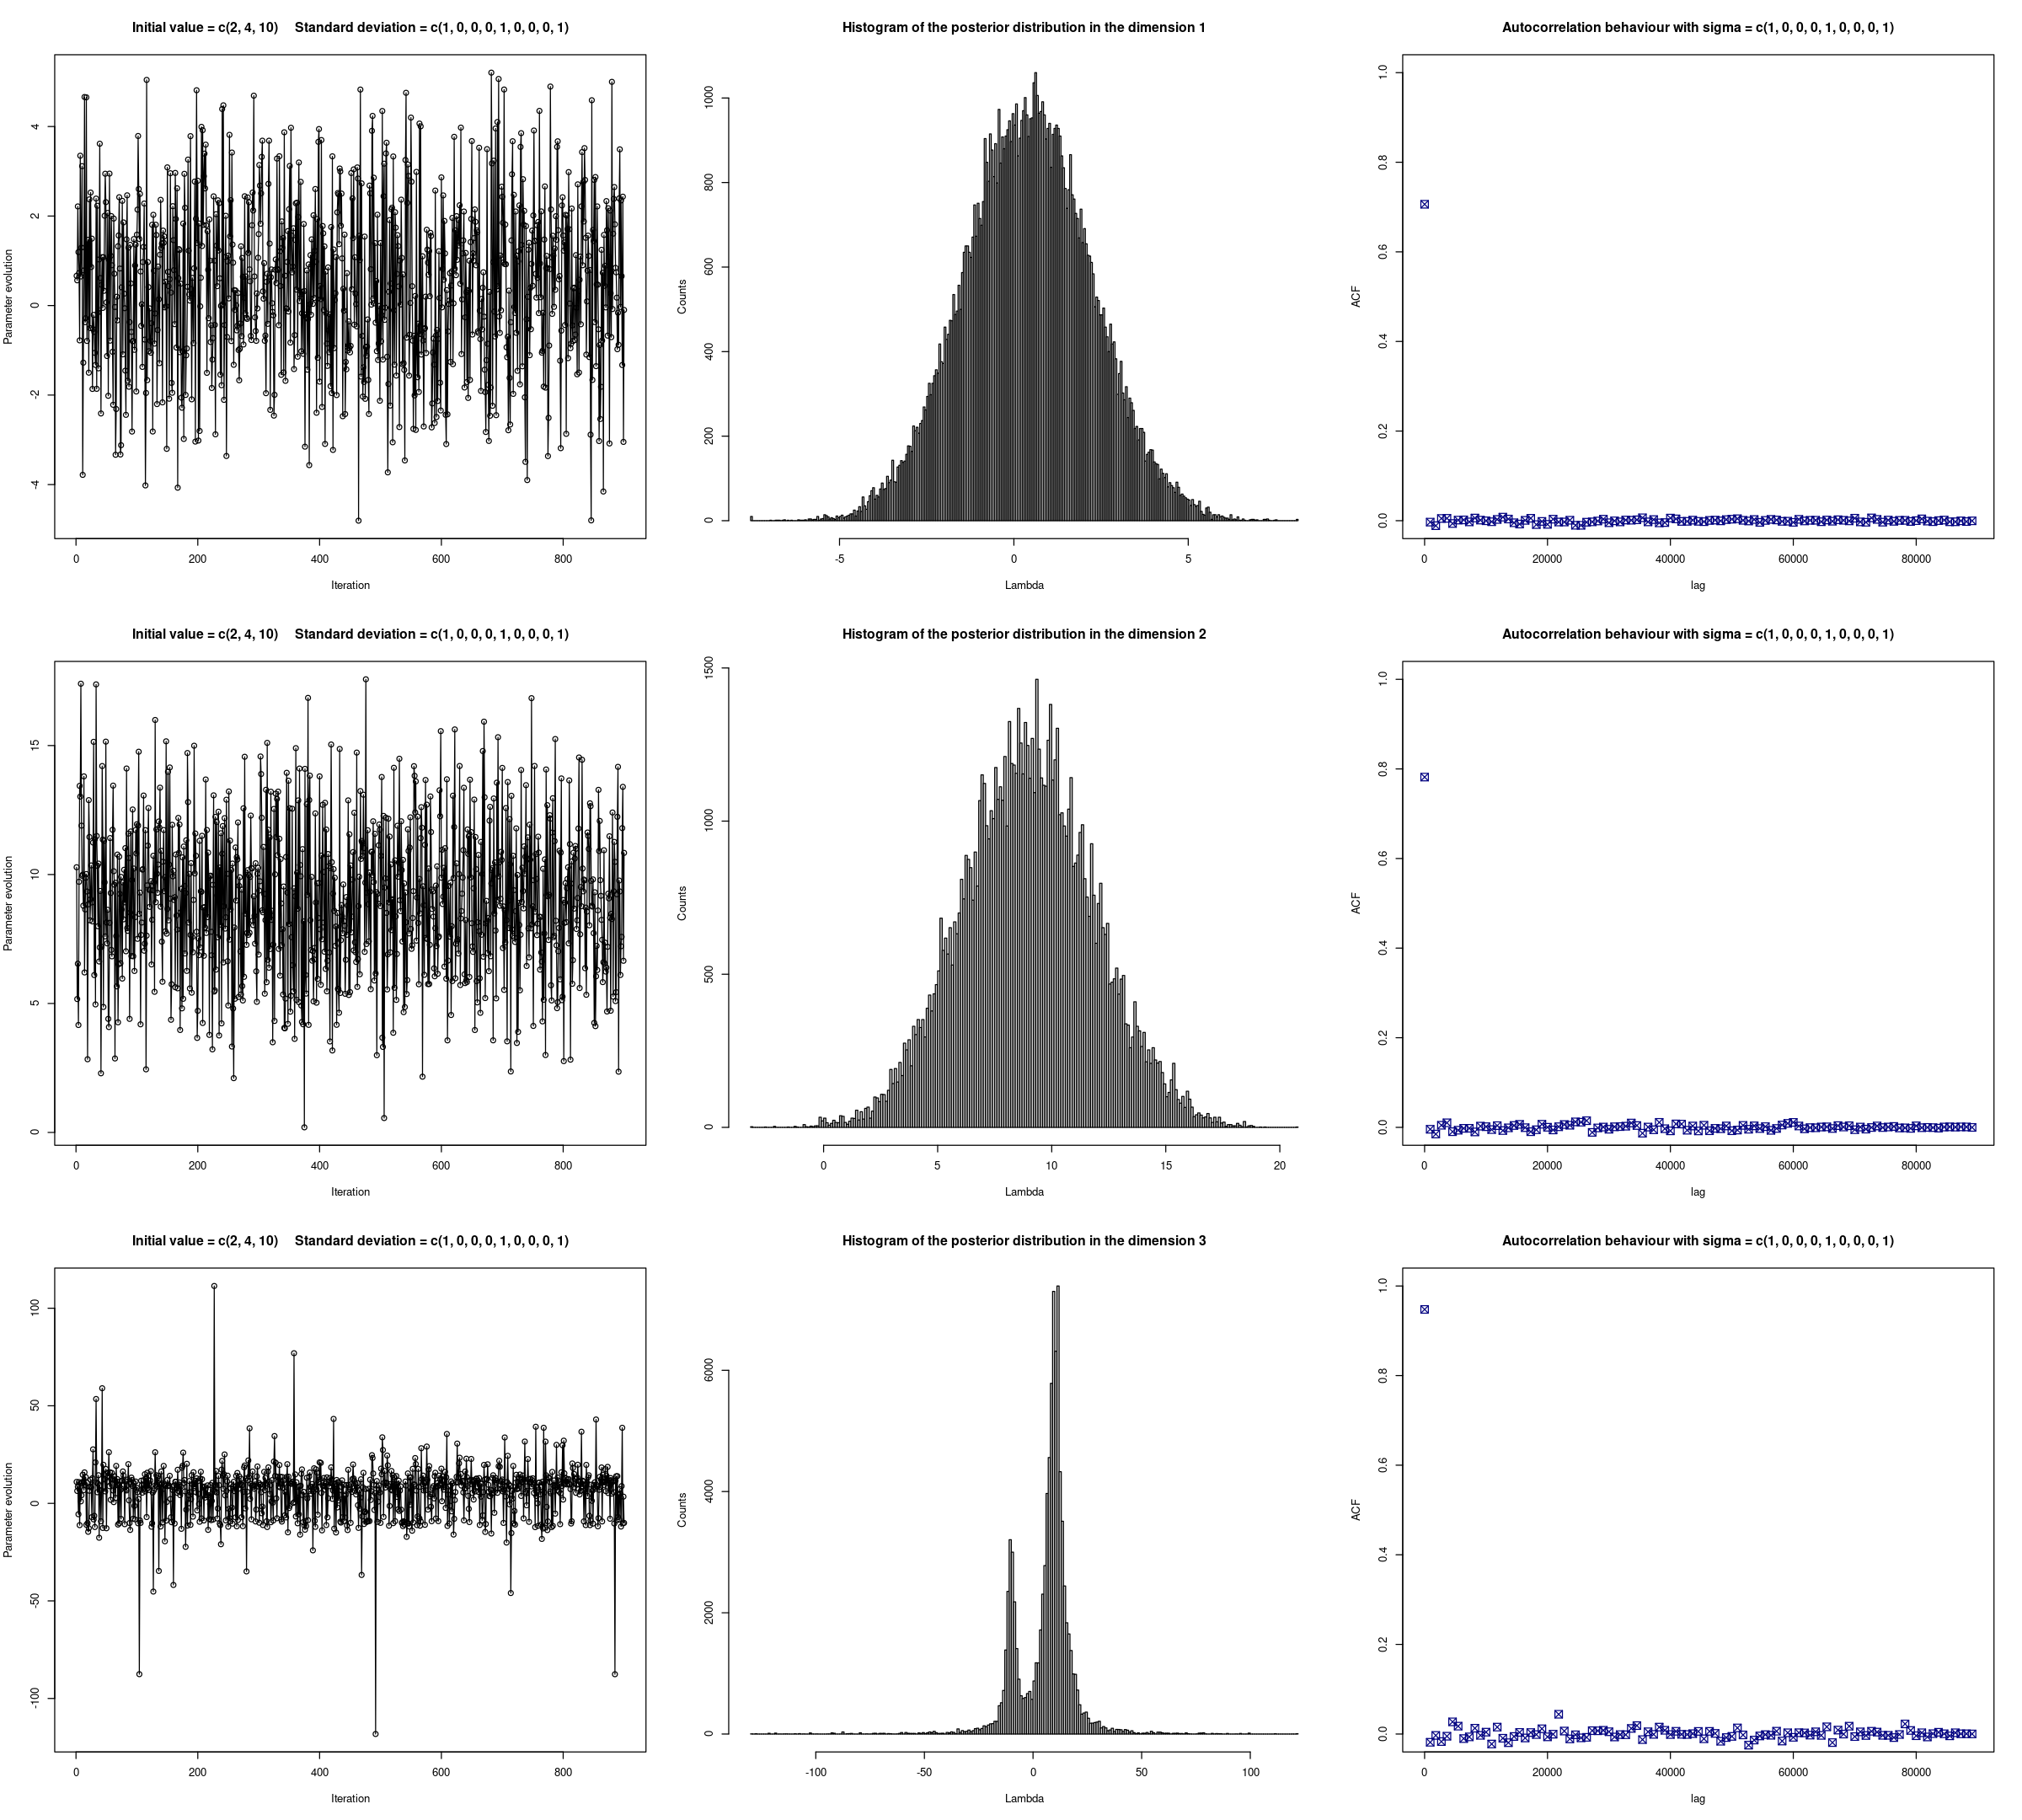

In [10]:
# HAARIO GIBBS

mcmc_g = random_steps_haario_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                    sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  40.93091 %
Final mean =  0.462955 8.979017 6.841773 
Final covariance matrix = 
            [,1]        [,2]        [,3]
[1,]  3.05488863  0.05595272  -0.6906359
[2,]  0.05595272  8.93331338  -3.6270105
[3,] -0.69063587 -3.62701053 957.0302667


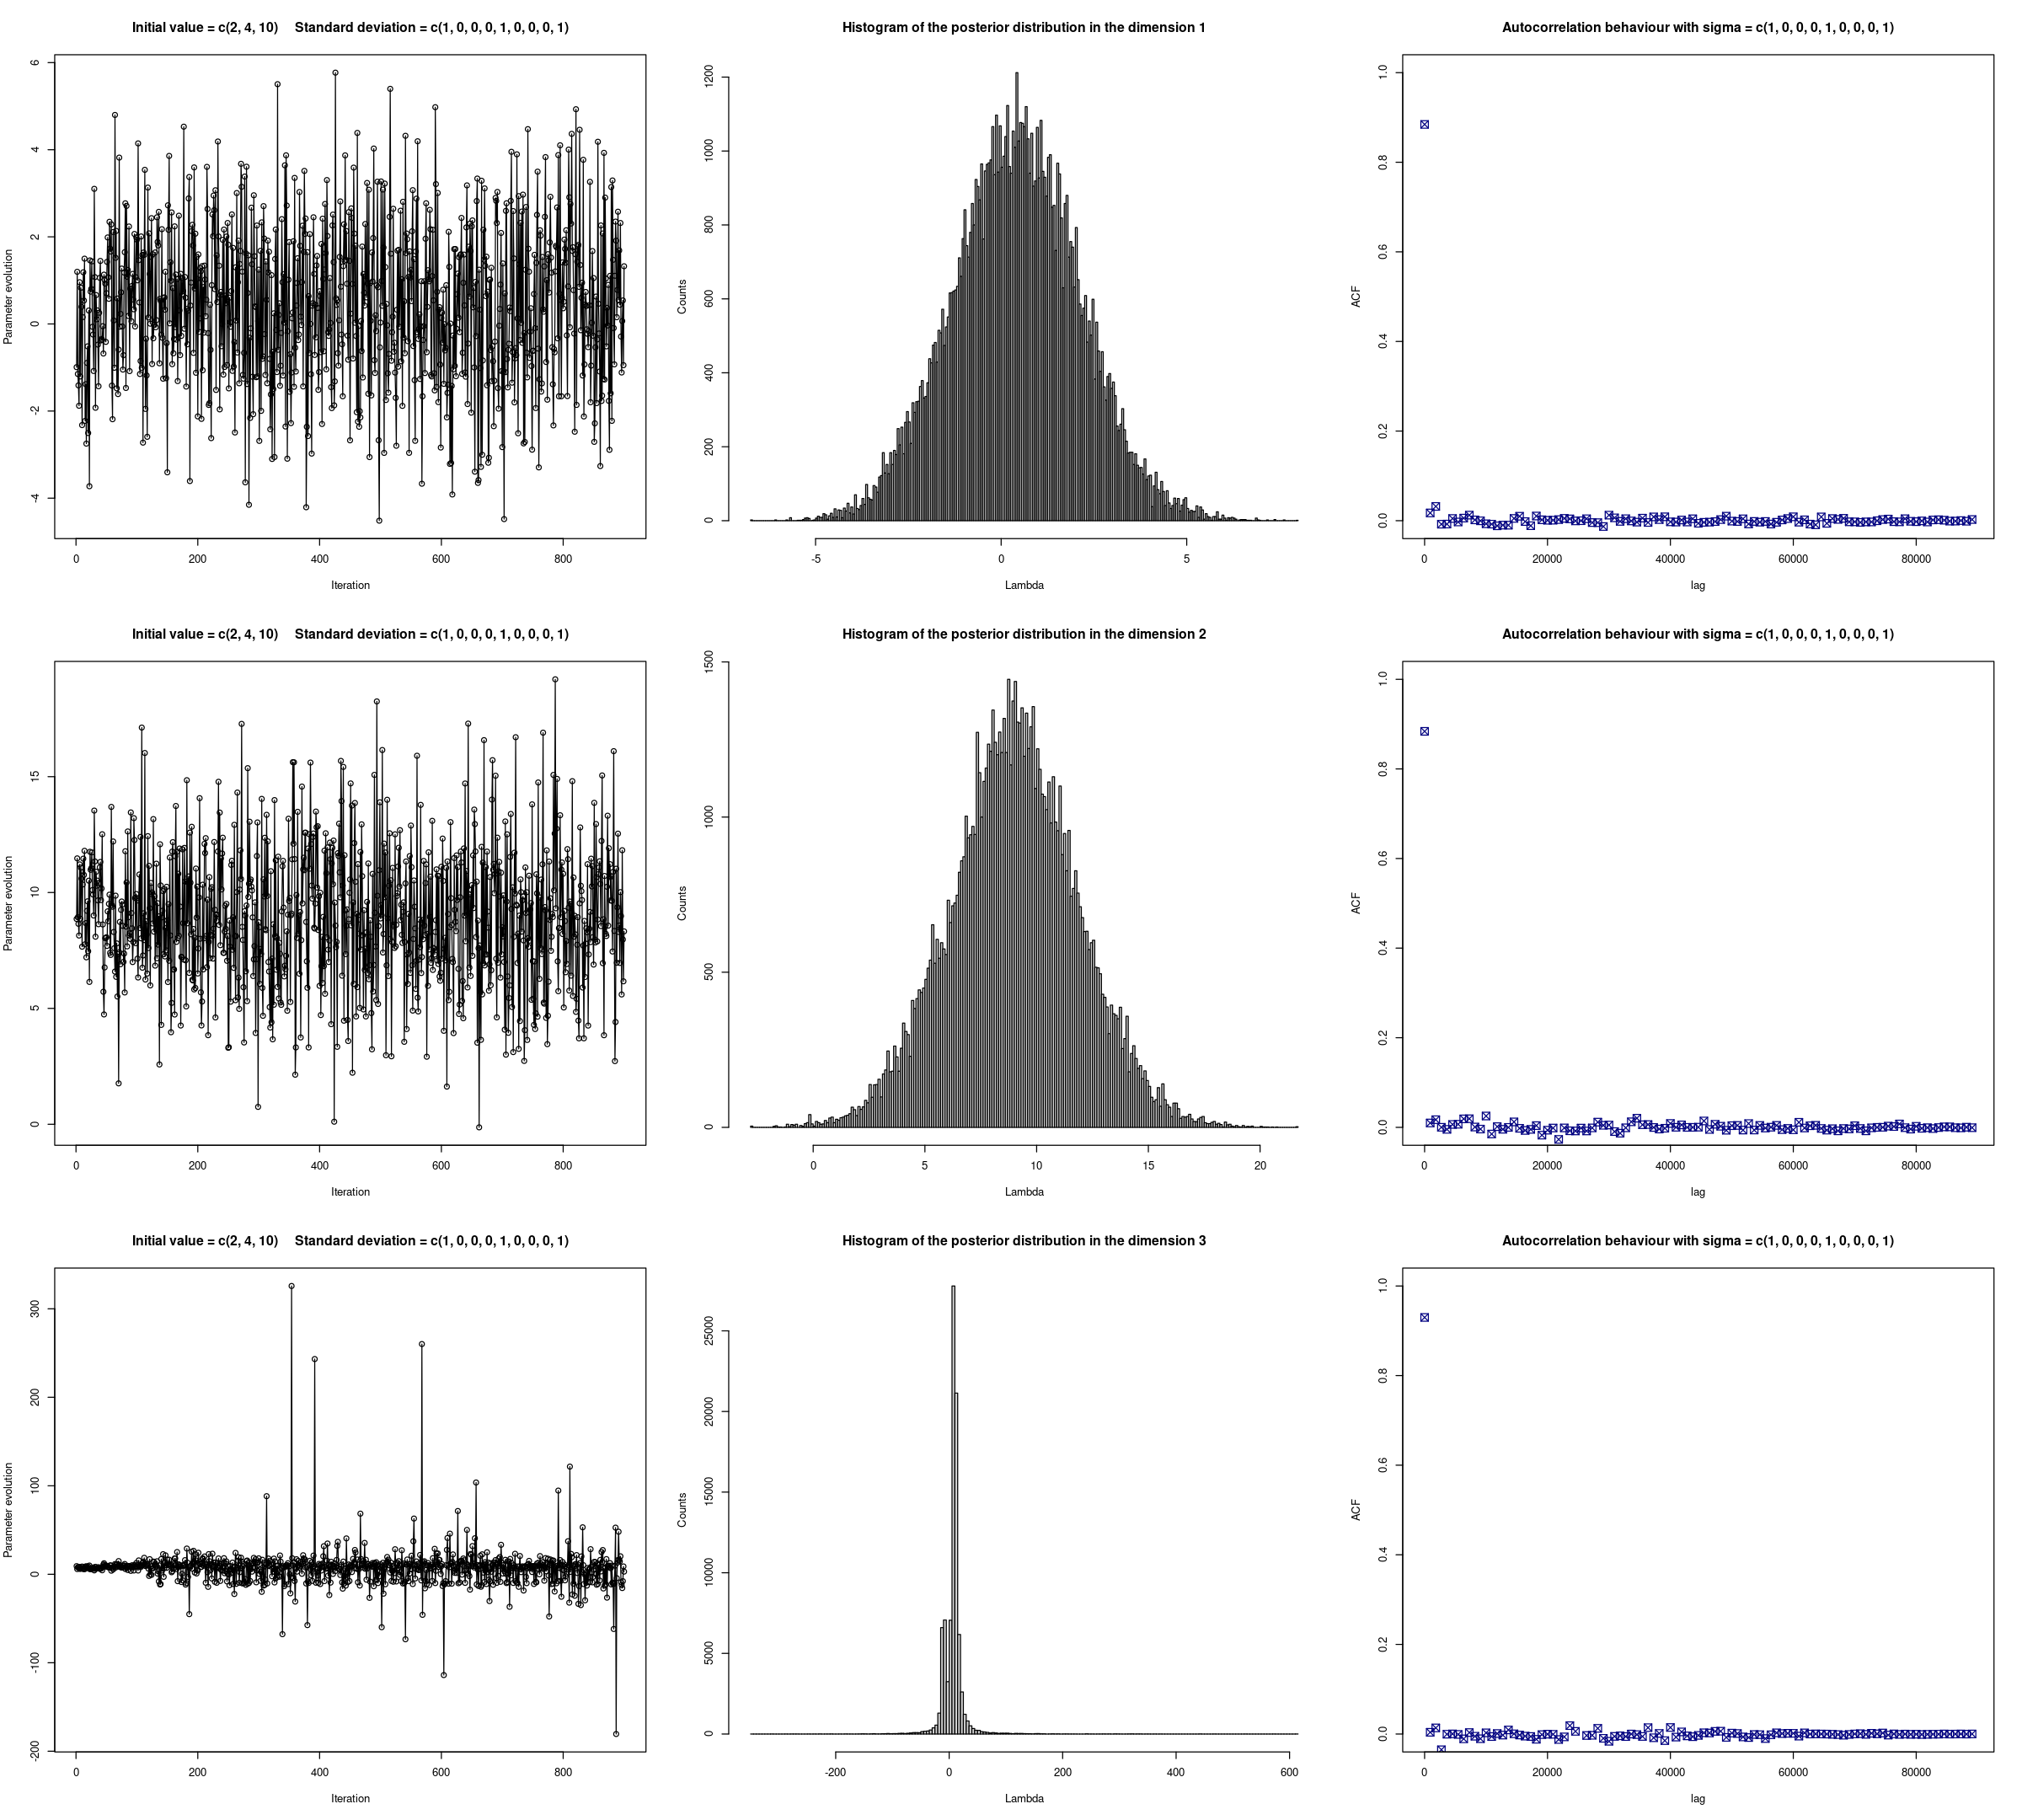

In [11]:
# RAO

mcmc_g = random_steps_AM_rao (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  60.20121 %
Final mean =  0.4116824 9.146767 6.25032 
Final covariance matrix = 
           [,1]       [,2]        [,3]
[1,]  3.6156579  0.0340206  -0.1344118
[2,]  0.0340206  8.3856313  -0.2840109
[3,] -0.1344118 -0.2840109 275.6137682


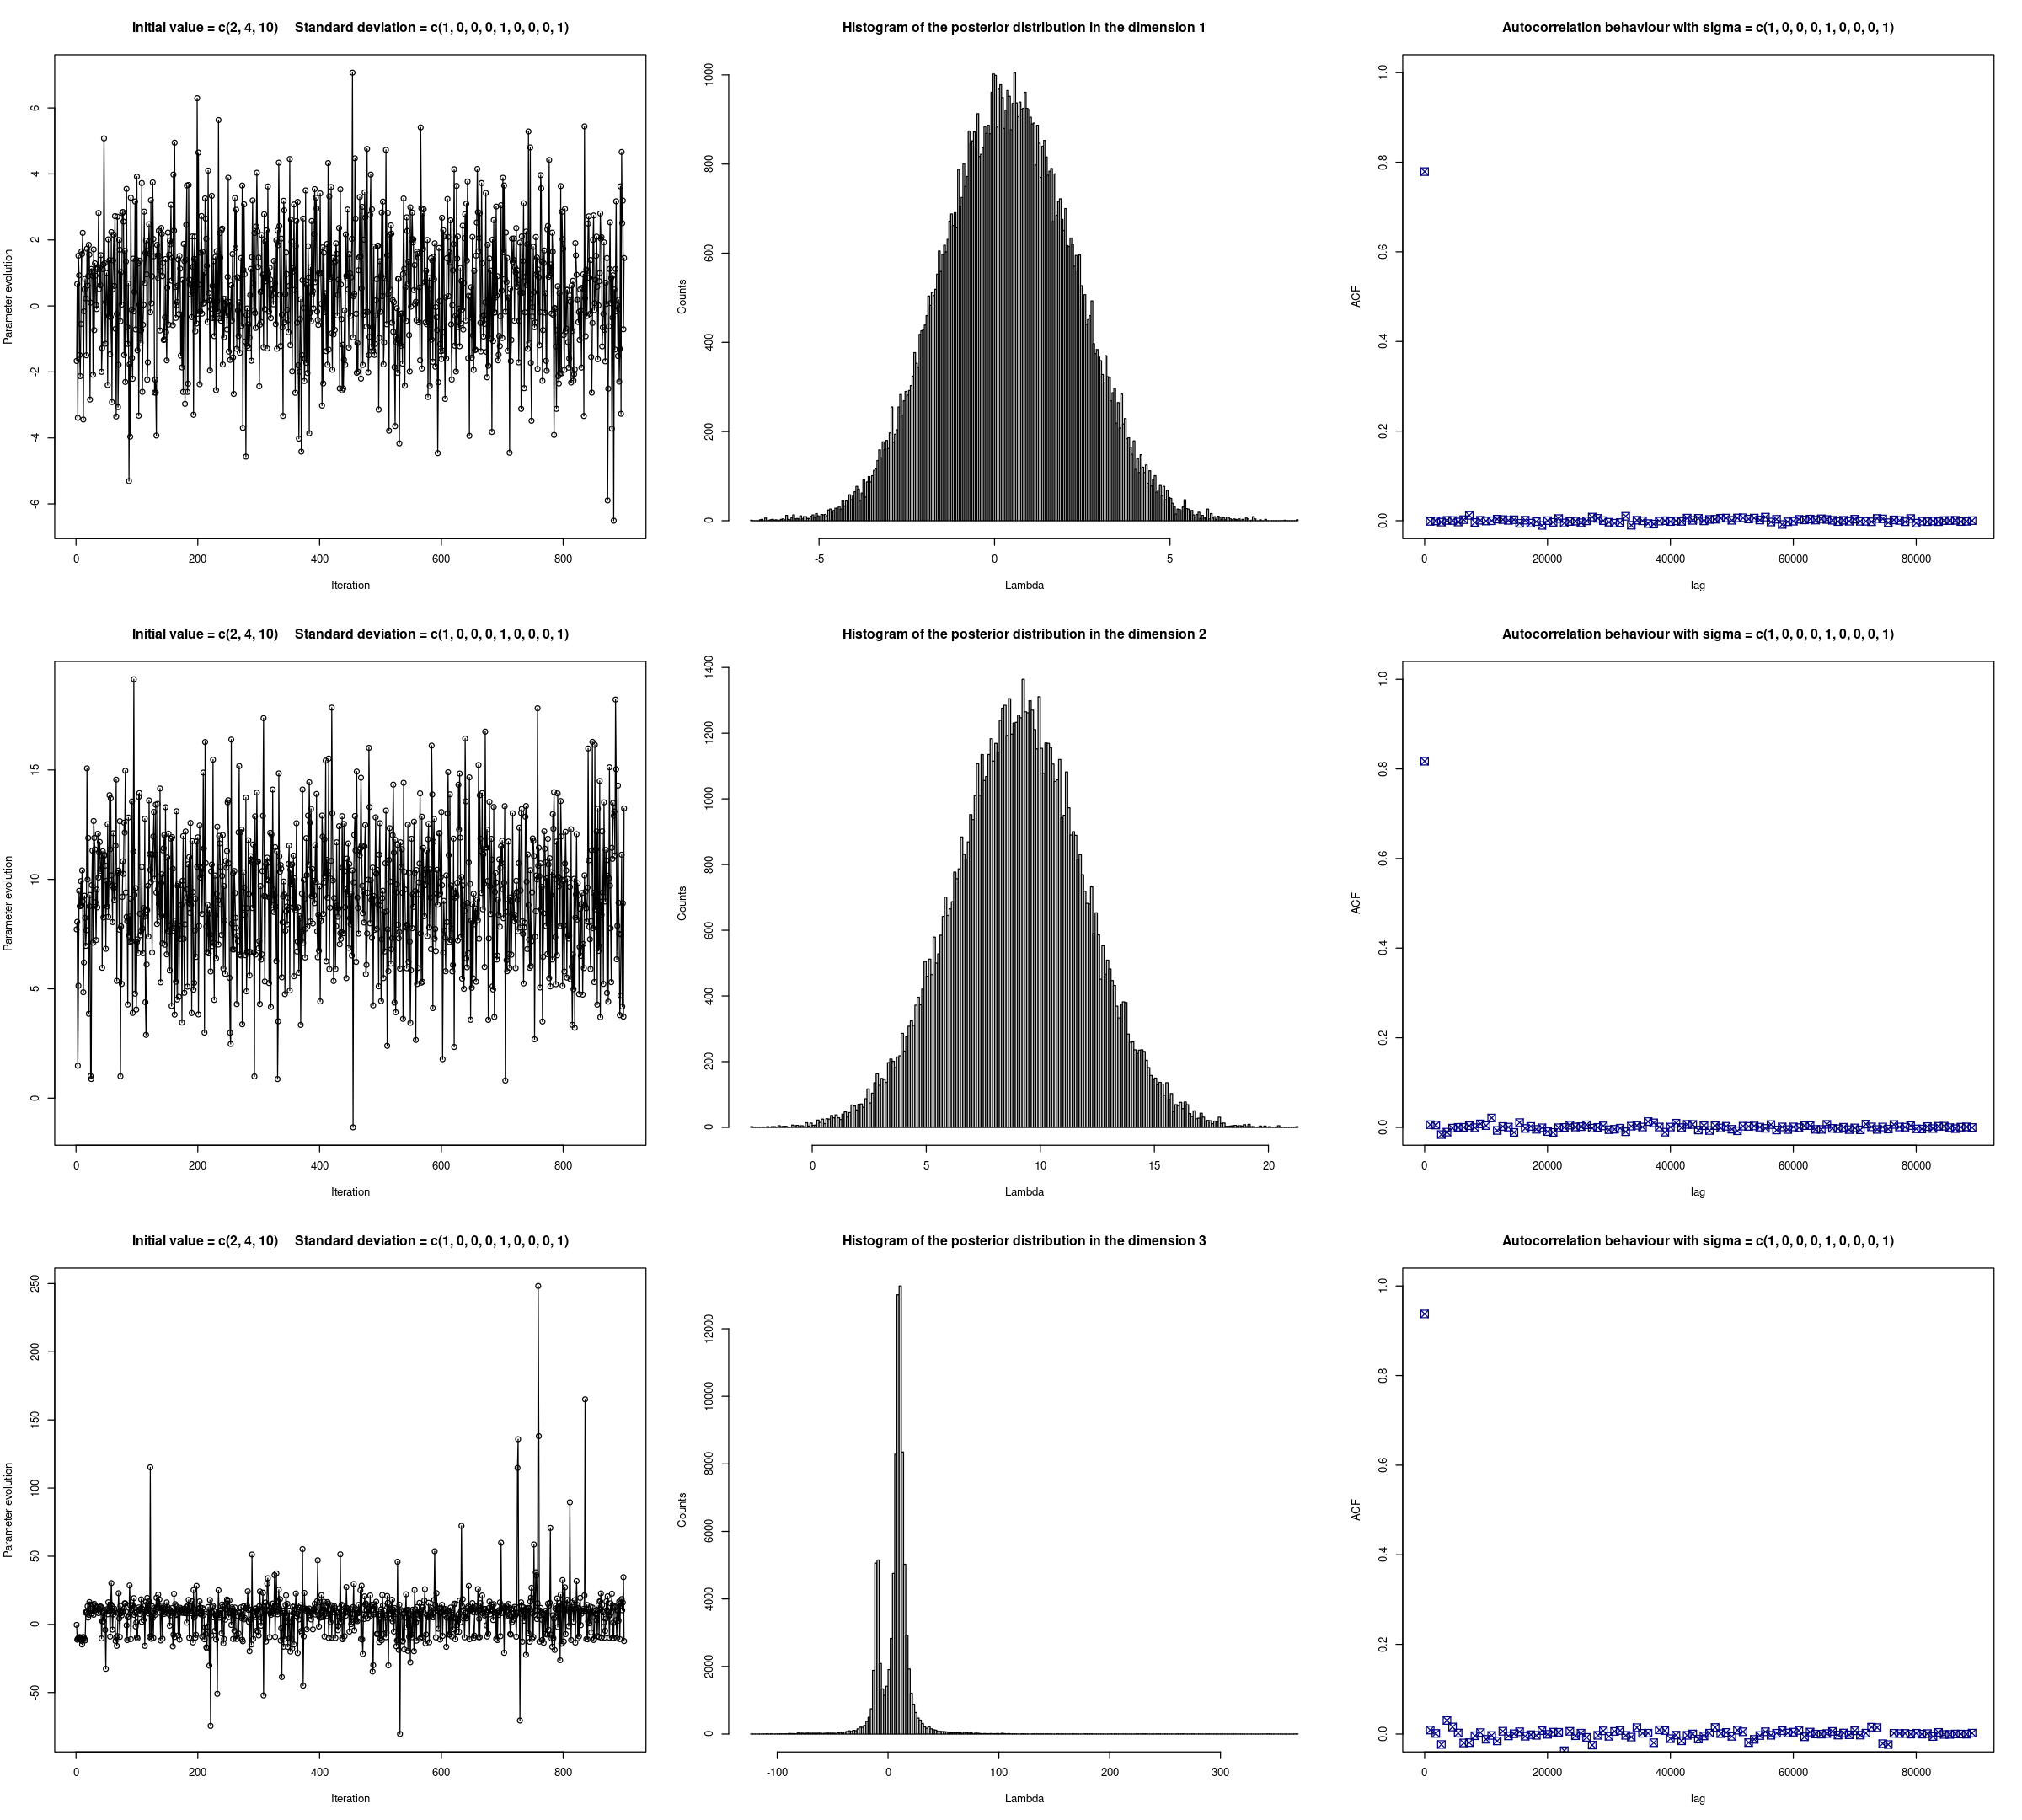

In [12]:
# RAO GIBBS

mcmc_g = random_steps_AM_rao_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  96.57909 %
Final mean =  0.05294788 13.93435 3.136708 
Final lambda =  -38.47616 
Final covariance matrix = 
               [,1]          [,2]           [,3]
[1,]  4.940656e-324 4.940656e-324 -4.940656e-324
[2,]  4.940656e-324 4.940656e-324  4.940656e-324
[3,] -4.940656e-324 4.940656e-324  4.940656e-324


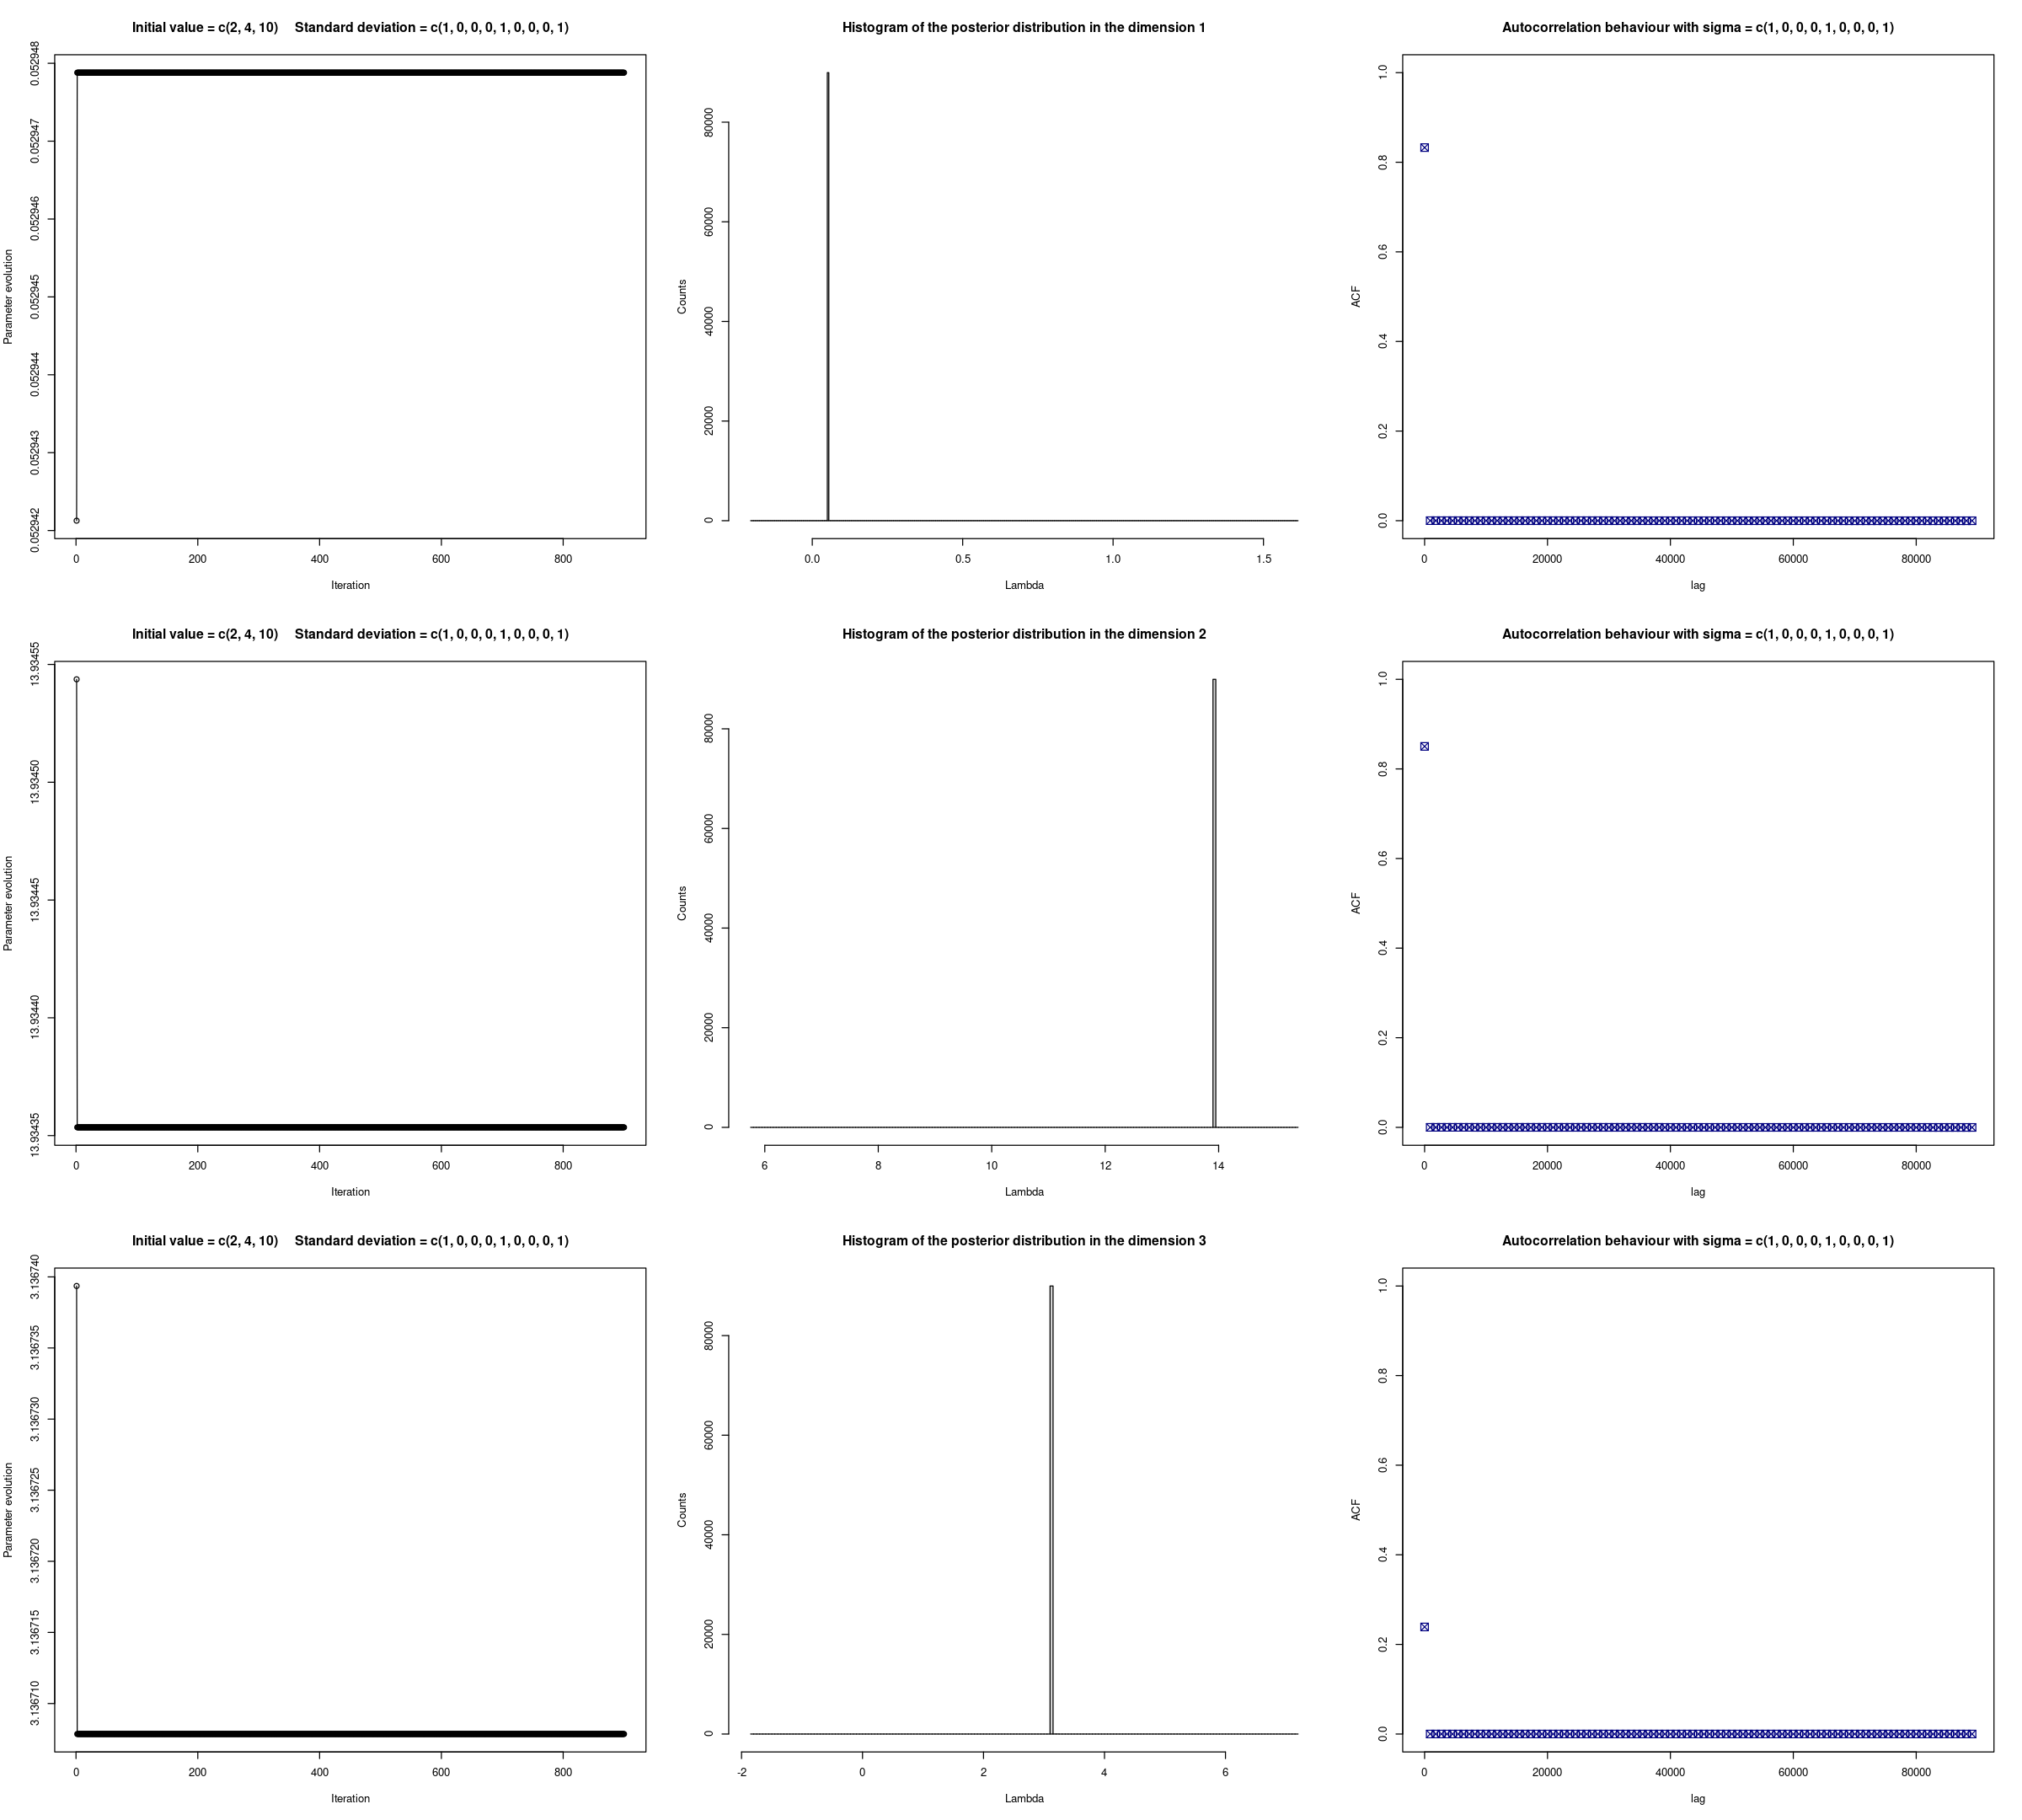

In [13]:
# GLOBAL

mcmc_g = random_steps_global (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  69.31939 %
Final mean =  0.4589229 9.070593 2.772932 
Final lambda =  -0.8236005 
Final covariance matrix = 
           [,1]       [,2]        [,3]
[1,]  3.6474076 -0.5074873  -0.7585948
[2,] -0.5074873  8.6763458  -1.2214647
[3,] -0.7585948 -1.2214647 474.6624357


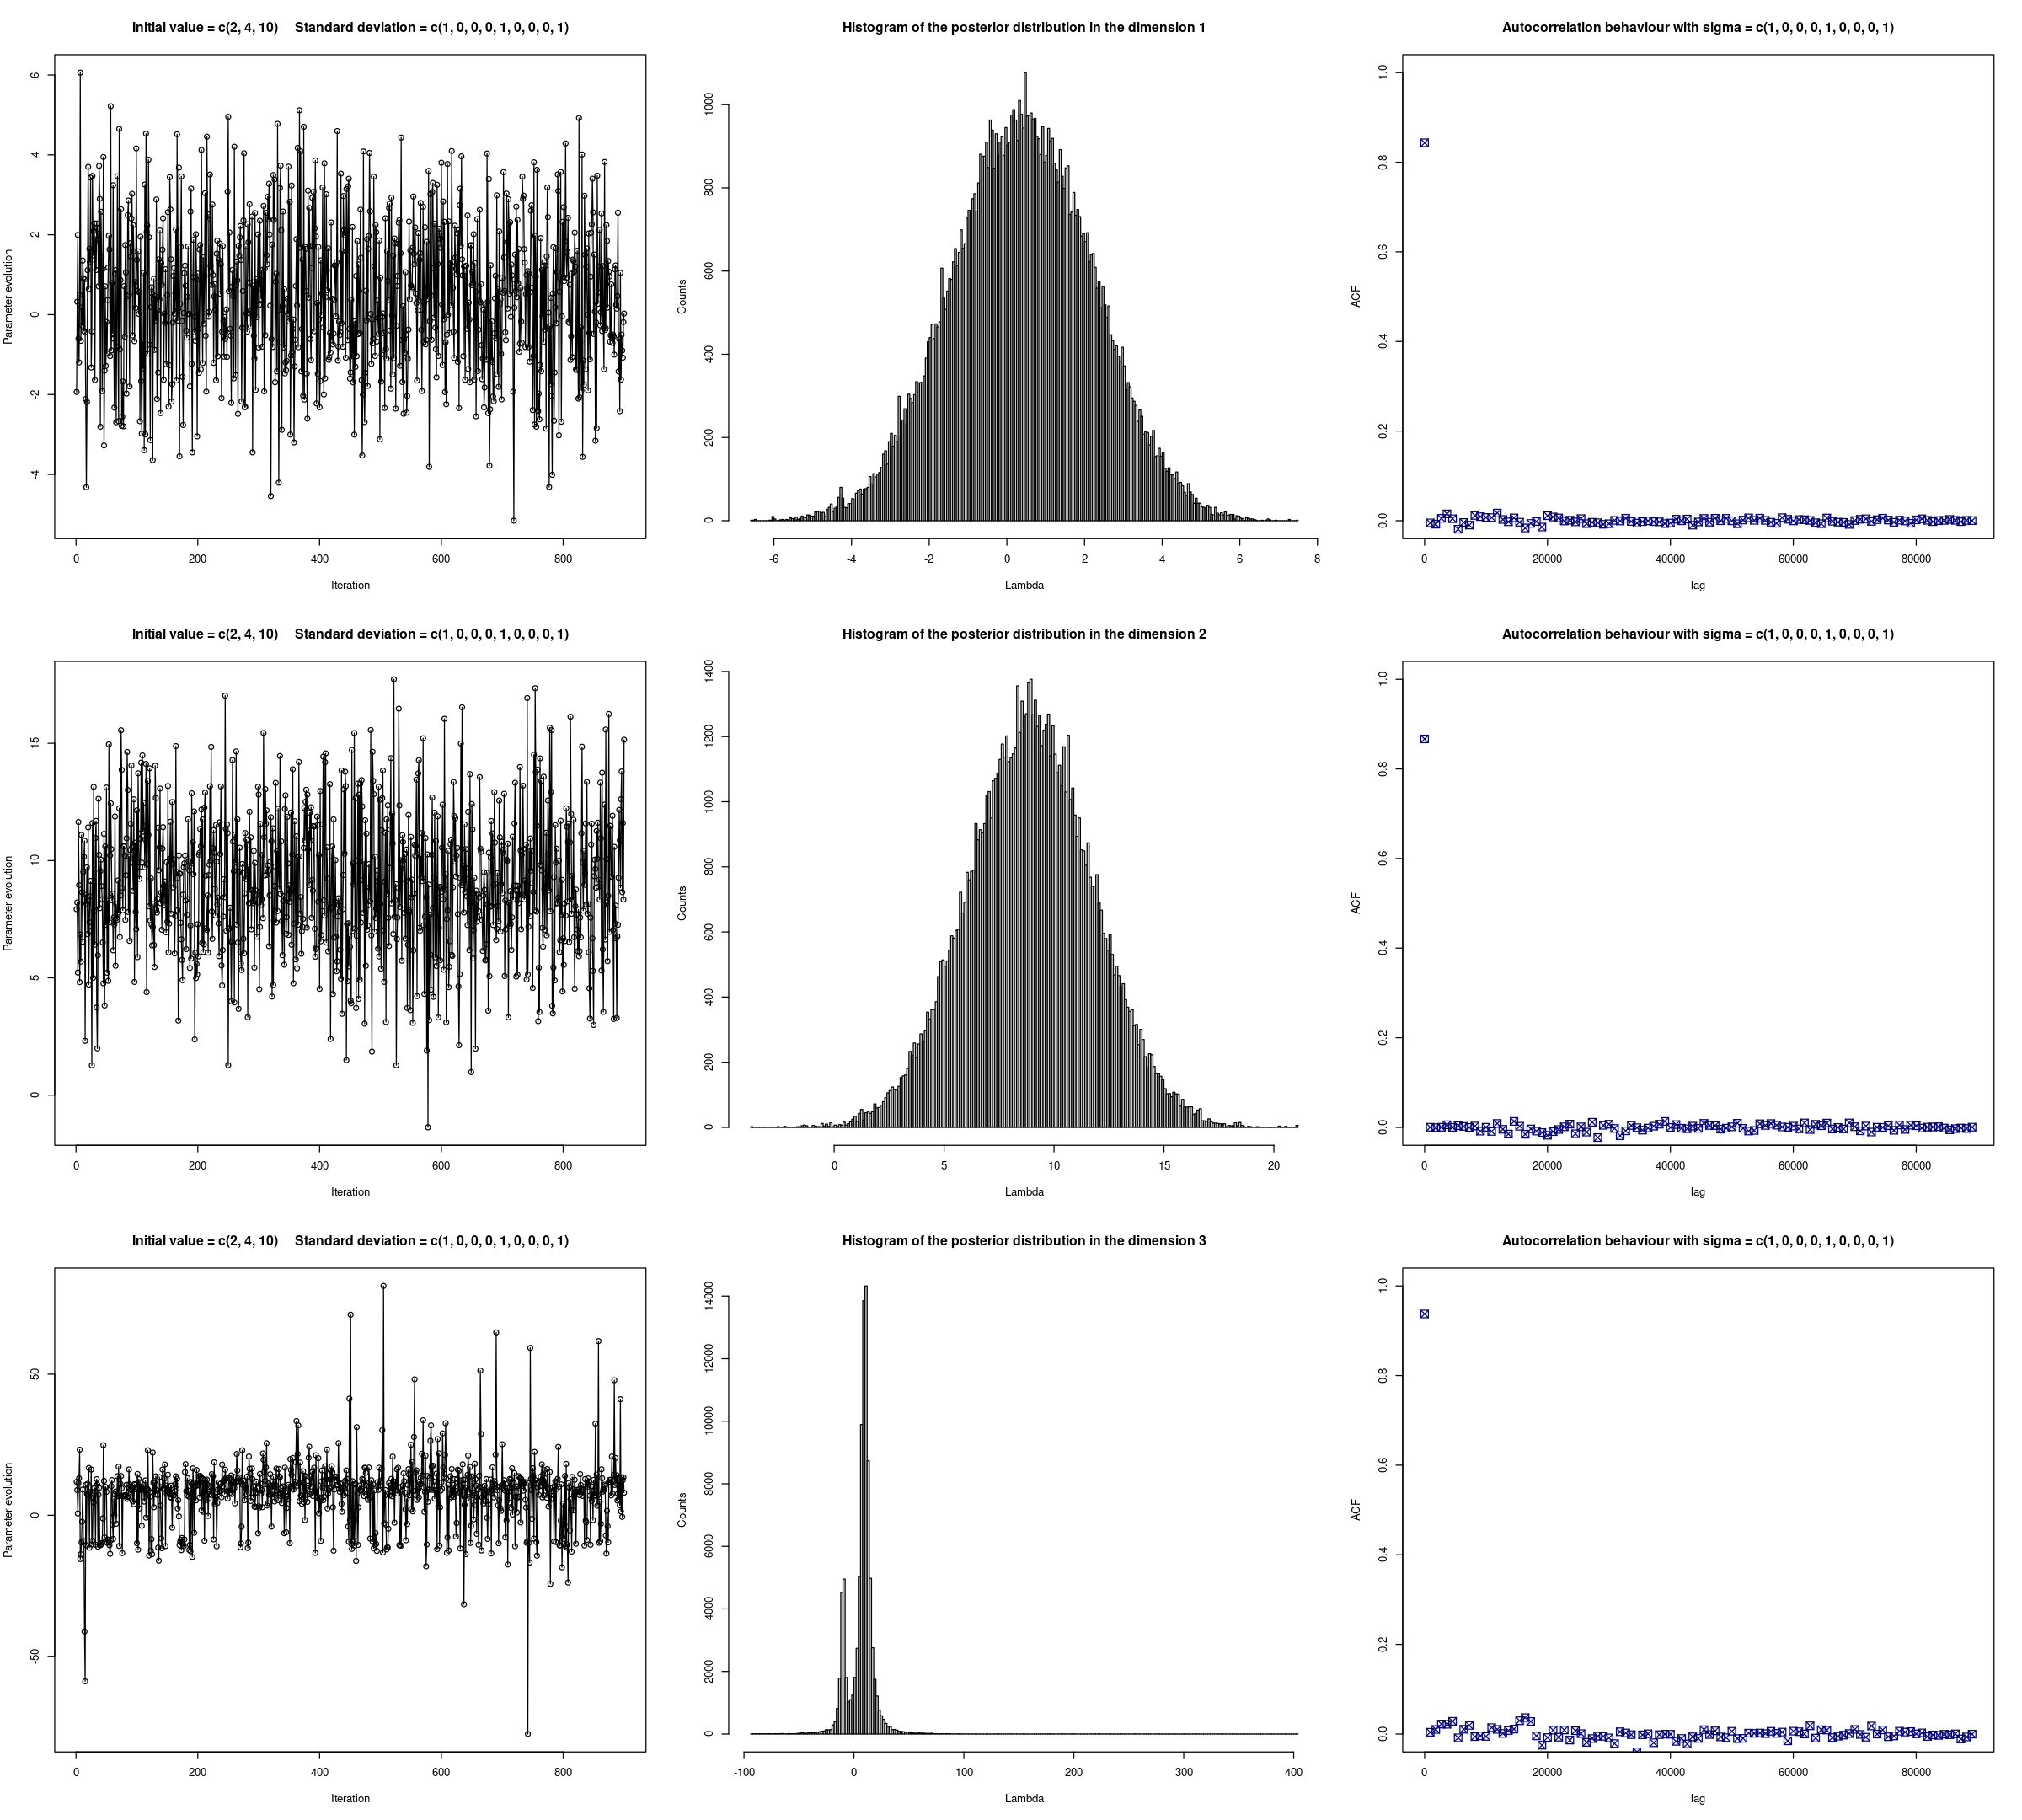

In [14]:
# GLOBAL GIBBS

mcmc_g = random_steps_global_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)